In [3]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [5]:
#Importing libraries 
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Krishnan
[nltk_data]     Srinivas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Krishnan
[nltk_data]     Srinivas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [128]:
df = pd.read_csv("cleaned_df.csv")

In [11]:
df.head()

Airport                                             Review  \
0  Istanbul  ✅ Trip Verified | I'm flying 50-60 times a yea...   
1  Istanbul  Not Verified | Ridiculous prices on everything...   
2  Istanbul  Not Verified | The biggest trap for the touris...   
3  Istanbul  ✅ Trip Verified | Fast food price is just ridi...   
4  Istanbul  ✅ Trip Verified | This airport is luxury and n...   

   Overall Rating  Recommended Type of Traveller             Experience  \
0             1.0            0          Business         Departure Only   
1             2.0            0    Family Leisure  Arrival and Departure   
2             1.0            0    Couple Leisure         Departure Only   
3             2.0            0      Solo Leisure                Transit   
4             2.0            0          Business  Arrival and Departure   

   Terminal Cleanliness  Terminal Seating  Terminal Signs  Food & Beverages  \
0                   4.0               2.0             3.0               1.0   
1                   2.0               1.0             3.0               1.0   
2                   1.0               1.0             1.0               1.0   
3                   5.0               5.0             5.0               1.0   
4                   1.0               2.0             3.0               3.0   

   Airport Shopping  Wifi Connectivity  Airport Staff    Year  
0               3.0                3.0            2.0  2025.0  
1               1.0                1.0            1.0  2025.0  
2               1.0                1.0            1.0  2025.0  
3               1.0                5.0            3.0  2025.0  
4               4.0                2.0            1.0  2025.0

In [130]:
import pandas as pd

df_categories = df.drop(columns=['Airport', 'Review','Overall Rating','Recommended', 'Type of Traveller','Experience','Year'])

# Display the result
df_categories()

      Terminal Cleanliness  Terminal Seating  Terminal Signs  \
0                      4.0               2.0             3.0   
1                      2.0               1.0             3.0   
2                      1.0               1.0             1.0   
3                      5.0               5.0             5.0   
4                      1.0               2.0             3.0   
...                    ...               ...             ...   
2661                   4.0               3.0             4.0   
2662                   4.0               3.0             4.0   
2663                   4.0               3.0             4.0   
2664                   4.0               3.0             4.0   
2665                   4.0               3.0             4.0   

      Food & Beverages  Airport Shopping  Wifi Connectivity  Airport Staff  
0                  1.0               3.0                3.0            2.0  
1                  1.0               1.0                1.0            1.0  


In [132]:
df_categories.head()

Terminal Cleanliness  Terminal Seating  Terminal Signs  Food & Beverages  \
0                   4.0               2.0             3.0               1.0   
1                   2.0               1.0             3.0               1.0   
2                   1.0               1.0             1.0               1.0   
3                   5.0               5.0             5.0               1.0   
4                   1.0               2.0             3.0               3.0   

   Airport Shopping  Wifi Connectivity  Airport Staff  
0               3.0                3.0            2.0  
1               1.0                1.0            1.0  
2               1.0                1.0            1.0  
3               1.0                5.0            3.0  
4               4.0                2.0            1.0

**Correlation Analysis**

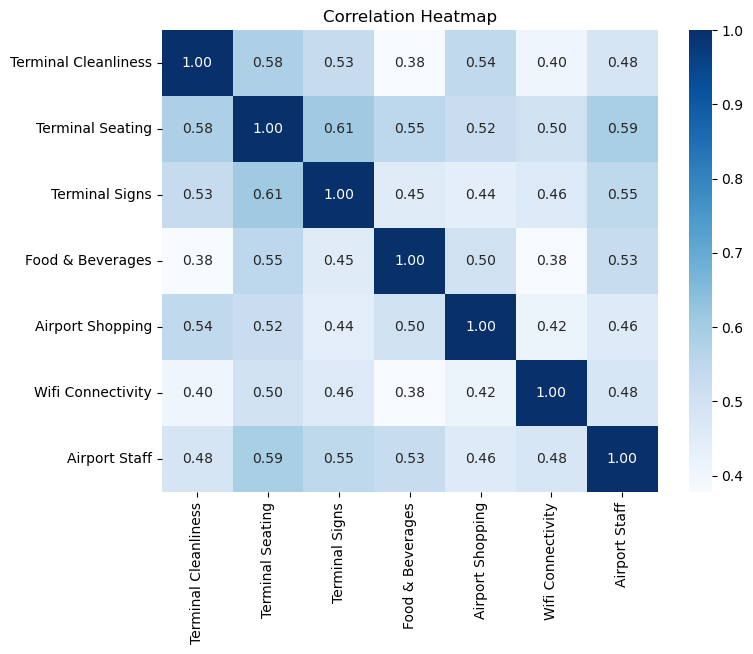

In [144]:
correlation_matrix=df_categories.corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')  
plt.show()

**Sentiment Analysis**

In [21]:
#Preprocessing function to clean the review column of unnecessary emojis and text before running sentiment analysis
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')


def clean_text(text):
    if isinstance(text,str):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        text = re.sub(r'\d+', '', text) #Removing numbers
        text = re.sub(r'\s+', ' ', text).strip()
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        return " ".join(tokens)
    return ""



[nltk_data] Downloading package punkt to C:\Users\Krishnan
[nltk_data]     Srinivas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Krishnan
[nltk_data]     Srinivas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('all')

def clean_text(text):
    if isinstance(text, str):  # Check if input is string
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        tokens = word_tokenize(text)  # Tokenize text
        tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
        return " ".join(tokens)  # Convert list back to string
    return ""  # Return empty string for non-text inputs

# Apply the function to your dataset
df["Cleaned Review"] = df["Review"].apply(clean_text)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Krishnan
[nltk_data]    |     Srinivas\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\Users\Krishnan
[nltk_data]    |     Srinivas\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Krishnan
[nltk_data]    |     Srinivas\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Krishnan
[nltk_data]    |     Srinivas\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Kr

In [29]:
df.head()

Airport                                             Review  \
0  Istanbul  ✅ Trip Verified | I'm flying 50-60 times a yea...   
1  Istanbul  Not Verified | Ridiculous prices on everything...   
2  Istanbul  Not Verified | The biggest trap for the touris...   
3  Istanbul  ✅ Trip Verified | Fast food price is just ridi...   
4  Istanbul  ✅ Trip Verified | This airport is luxury and n...   

   Overall Rating  Recommended Type of Traveller             Experience  \
0             1.0            0          Business         Departure Only   
1             2.0            0    Family Leisure  Arrival and Departure   
2             1.0            0    Couple Leisure         Departure Only   
3             2.0            0      Solo Leisure                Transit   
4             2.0            0          Business  Arrival and Departure   

   Terminal Cleanliness  Terminal Seating  Terminal Signs  Food & Beverages  \
0                   4.0               2.0             3.0               1.0   
1                   2.0               1.0             3.0               1.0   
2                   1.0               1.0             1.0               1.0   
3                   5.0               5.0             5.0               1.0   
4                   1.0               2.0             3.0               3.0   

   Airport Shopping  Wifi Connectivity  Airport Staff    Year  \
0               3.0                3.0            2.0  2025.0   
1               1.0                1.0            1.0  2025.0   
2               1.0                1.0            1.0  2025.0   
3               1.0                5.0            3.0  2025.0   
4               4.0                2.0            1.0  2025.0   

                                      Cleaned Review  
0  trip verified im flying times year average mus...  
1  verified ridiculous prices everything tired st...  
2  verified biggest trap tourists worldwide one b...  
3  trip verified fast food price ridiculously exp...  
4  trip verified airport luxury new however multi...

In [47]:
#carrying out sentiment analysis
analyzer = SentimentIntensityAnalyzer()

# sentiment function to get only compound scores
def get_sentiment(text):
    if text == "":
        return 0
    sentiment_score = analyzer.polarity_scores(text)["compound"]
    return sentiment_score

In [49]:
#Applying sentiment analysis
df["Sentiment_Score"] = df["Cleaned Review"].apply(get_sentiment)

In [50]:
df.head()

Airport                                             Review  \
0  Istanbul  ✅ Trip Verified | I'm flying 50-60 times a yea...   
1  Istanbul  Not Verified | Ridiculous prices on everything...   
2  Istanbul  Not Verified | The biggest trap for the touris...   
3  Istanbul  ✅ Trip Verified | Fast food price is just ridi...   
4  Istanbul  ✅ Trip Verified | This airport is luxury and n...   

   Overall Rating  Recommended Type of Traveller             Experience  \
0             1.0            0          Business         Departure Only   
1             2.0            0    Family Leisure  Arrival and Departure   
2             1.0            0    Couple Leisure         Departure Only   
3             2.0            0      Solo Leisure                Transit   
4             2.0            0          Business  Arrival and Departure   

   Terminal Cleanliness  Terminal Seating  Terminal Signs  Food & Beverages  \
0                   4.0               2.0             3.0               1.0   
1                   2.0               1.0             3.0               1.0   
2                   1.0               1.0             1.0               1.0   
3                   5.0               5.0             5.0               1.0   
4                   1.0               2.0             3.0               3.0   

   Airport Shopping  Wifi Connectivity  Airport Staff    Year  \
0               3.0                3.0            2.0  2025.0   
1               1.0                1.0            1.0  2025.0   
2               1.0                1.0            1.0  2025.0   
3               1.0                5.0            3.0  2025.0   
4               4.0                2.0            1.0  2025.0   

                                      Cleaned Review  Sentiment_Score  
0  trip verified im flying times year average mus...           0.1226  
1  verified ridiculous prices everything tired st...          -0.5994  
2  verified biggest trap tourists worldwide one b...           0.4588  
3  trip verified fast food price ridiculously exp...           0.7845  
4  trip verified airport luxury new however multi...          -0.9181

**Applying Sentiment Label from the Sentiment Score to classify reviews into Positive, Negative or Neutral**

In [53]:
df["Sentiment_Label"] = df["Sentiment_Score"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x <-0.05 else "Neutral"))

In [55]:
df.head()

Airport                                             Review  \
0  Istanbul  ✅ Trip Verified | I'm flying 50-60 times a yea...   
1  Istanbul  Not Verified | Ridiculous prices on everything...   
2  Istanbul  Not Verified | The biggest trap for the touris...   
3  Istanbul  ✅ Trip Verified | Fast food price is just ridi...   
4  Istanbul  ✅ Trip Verified | This airport is luxury and n...   

   Overall Rating  Recommended Type of Traveller             Experience  \
0             1.0            0          Business         Departure Only   
1             2.0            0    Family Leisure  Arrival and Departure   
2             1.0            0    Couple Leisure         Departure Only   
3             2.0            0      Solo Leisure                Transit   
4             2.0            0          Business  Arrival and Departure   

   Terminal Cleanliness  Terminal Seating  Terminal Signs  Food & Beverages  \
0                   4.0               2.0             3.0               1.0   
1                   2.0               1.0             3.0               1.0   
2                   1.0               1.0             1.0               1.0   
3                   5.0               5.0             5.0               1.0   
4                   1.0               2.0             3.0               3.0   

   Airport Shopping  Wifi Connectivity  Airport Staff    Year  \
0               3.0                3.0            2.0  2025.0   
1               1.0                1.0            1.0  2025.0   
2               1.0                1.0            1.0  2025.0   
3               1.0                5.0            3.0  2025.0   
4               4.0                2.0            1.0  2025.0   

                                      Cleaned Review  Sentiment_Score  \
0  trip verified im flying times year average mus...           0.1226   
1  verified ridiculous prices everything tired st...          -0.5994   
2  verified biggest trap tourists worldwide one b...           0.4588   
3  trip verified fast food price ridiculously exp...           0.7845   
4  trip verified airport luxury new however multi...          -0.9181   

  Sentiment_Label  
0        Positive  
1        Negative  
2        Positive  
3        Positive  
4        Negative

***Sentiment-Based Comparative Analysis (Indian vs Global Transit Hubs)***

This step will analyze passenger sentiment scores for Indian airports vs established global transit hubs to see how they compare in terms of positive, neutral, and negative experiences. 

In [59]:
#Defining Indian airports and updating table based on global or Indian airport for comparison

indian_airports = ["Delhi", "Mumbai", "Bangalore", "Hyderabad"]

df["Airport Type"] = df["Airport"].apply(lambda x: "Indian" if x in indian_airports else "Global Transit Hub")

In [63]:
sentiment_summary = df.groupby("Airport Type")["Sentiment_Score"].agg(["mean","count"])
print(sentiment_summary)

                        mean  count
Airport Type                       
Global Transit Hub  0.253064   1879
Indian              0.307287    787


In [71]:
sentiment_distribution = df.groupby(["Airport", "Sentiment_Label"])["Sentiment_Label"].count().unstack()
print(sentiment_distribution)

Sentiment_Label  Negative  Neutral  Positive
Airport                                     
Abu Dhabi             111        8       142
Bangalore              27        2        87
Bangkok               122        8       169
Delhi                 103       11       186
Doha                   30        8        82
Dubai                 142        5       153
Hong Kong              61        8       230
Hyderabad              19        2        50
Istanbul              135        6       159
Mumbai                 98        3       199
Singapore              44        8       248


In [75]:
df.to_csv("sentiment_analysis_results.csv", index=False)
print("filed saved in correct folder")

filed saved in correct folder


**Text Analysis using Wordcloud**



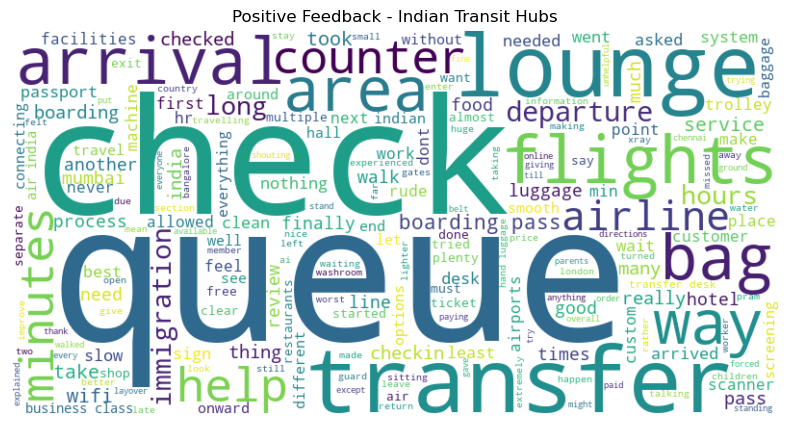

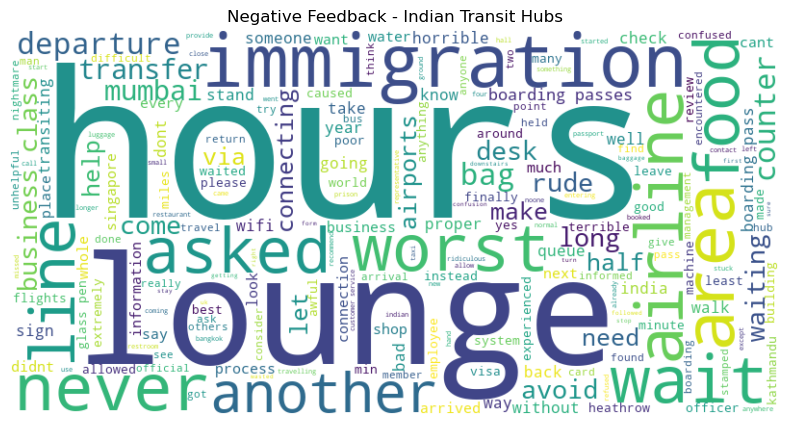

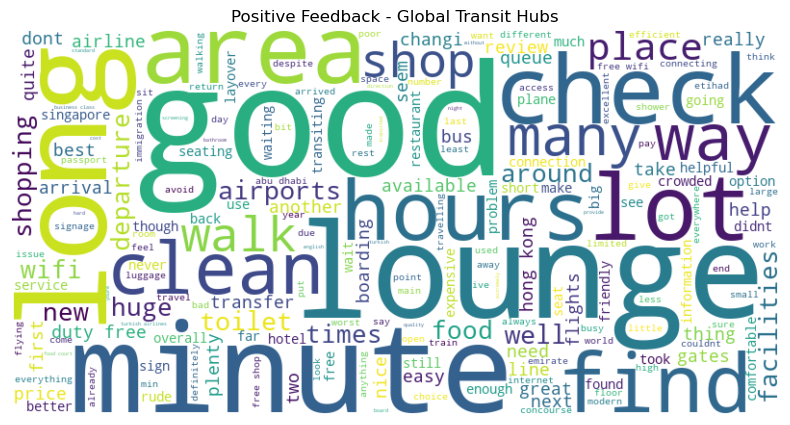

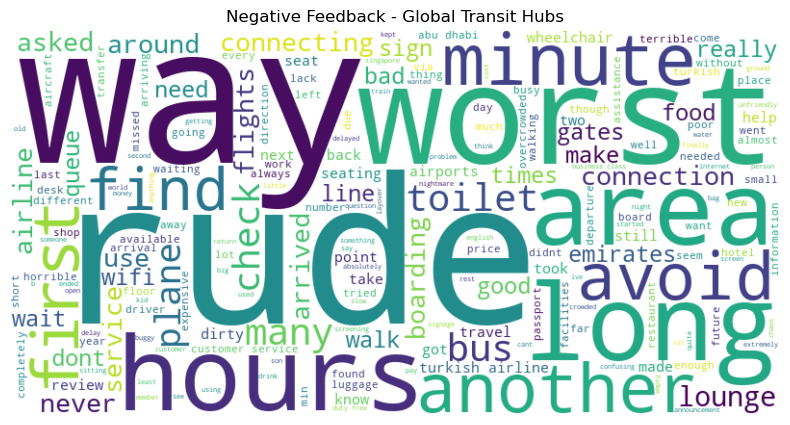

In [90]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter data for transit passengers
transit_reviews = df[df["Experience"] == "Transit"]

# Separate Indian and Global transit hubs
indian_transit = transit_reviews[transit_reviews["Airport Type"] == "Indian"]
global_transit = transit_reviews[transit_reviews["Airport Type"] == "Global Transit Hub"]

# Separate positive and negative reviews
indian_positive = indian_transit[indian_transit["Sentiment_Label"] == "Positive"]["Cleaned Review"]
indian_negative = indian_transit[indian_transit["Sentiment_Label"] == "Negative"]["Cleaned Review"]

global_positive = global_transit[global_transit["Sentiment_Label"] == "Positive"]["Cleaned Review"]
global_negative = global_transit[global_transit["Sentiment_Label"] == "Negative"]["Cleaned Review"]

# Convert to text for word clouds
indian_positive_text = " ".join(indian_positive)
indian_negative_text = " ".join(indian_negative)
global_positive_text = " ".join(global_positive)
global_negative_text = " ".join(global_negative)

# Custom stopwords list
custom_stopwords = set(STOPWORDS).union({
    "airport", "flight", "time", "terminal", "one", "people", "passenger", "hour", "gate", "international", "domestic", "even",
    "trip", "verified", "passengers", "transit", "staff", "security", "experience", "dubai", "delhi", "istanbul", "go", "us", "said", "told"
})

# Function to generate and display a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, stopwords=custom_stopwords, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds
generate_wordcloud(indian_positive_text, "Positive Feedback - Indian Transit Hubs")
generate_wordcloud(indian_negative_text, "Negative Feedback - Indian Transit Hubs")
generate_wordcloud(global_positive_text, "Positive Feedback - Global Transit Hubs")
generate_wordcloud(global_negative_text, "Negative Feedback - Global Transit Hubs")


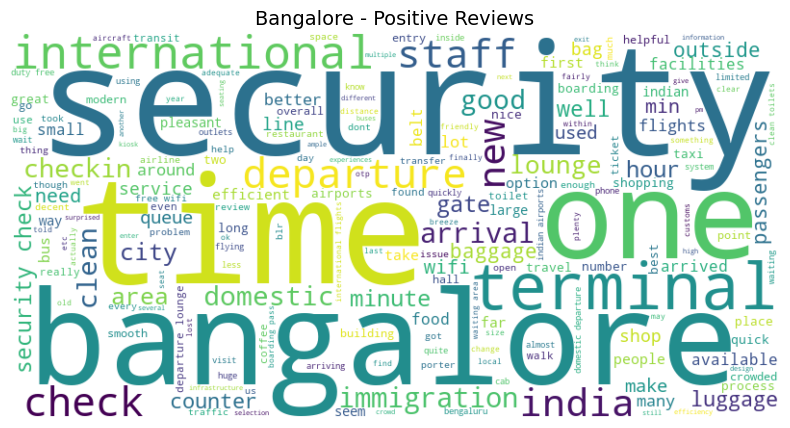

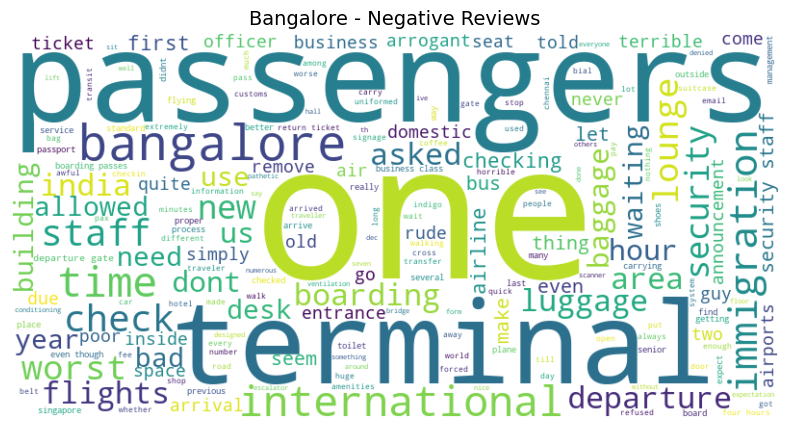

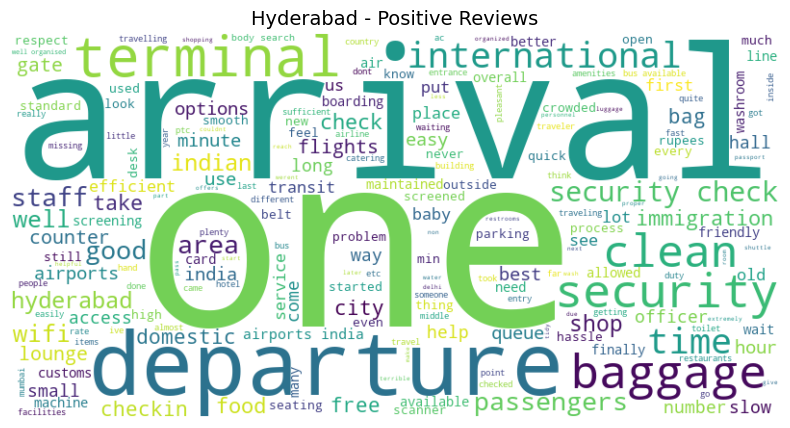

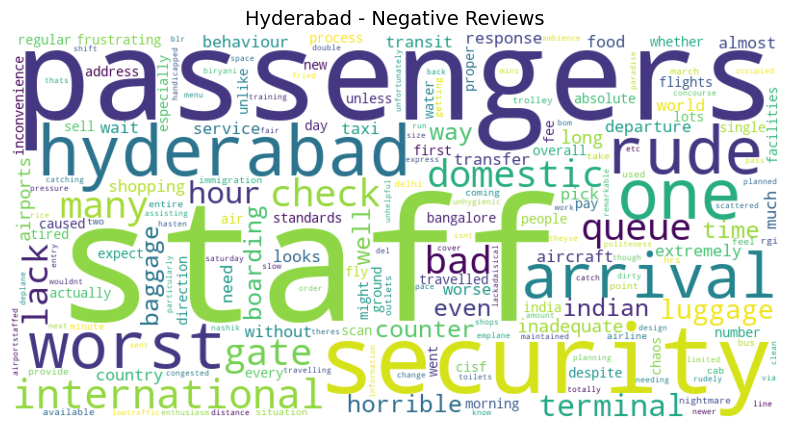

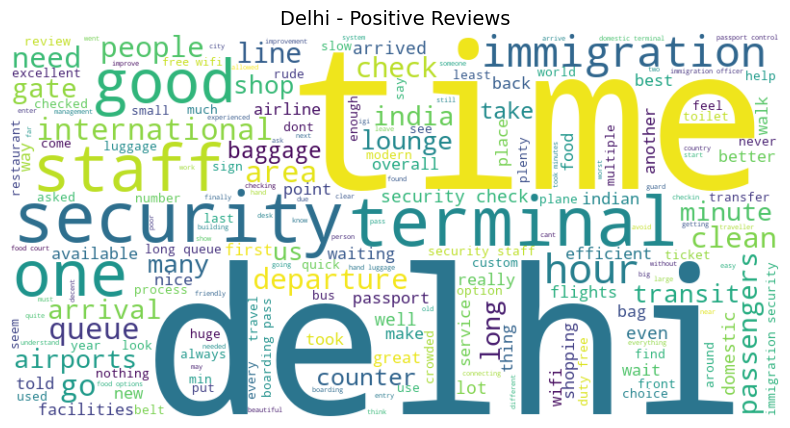

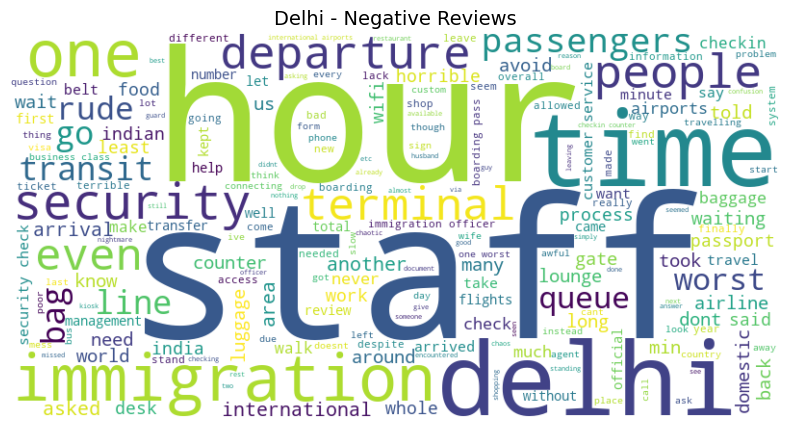

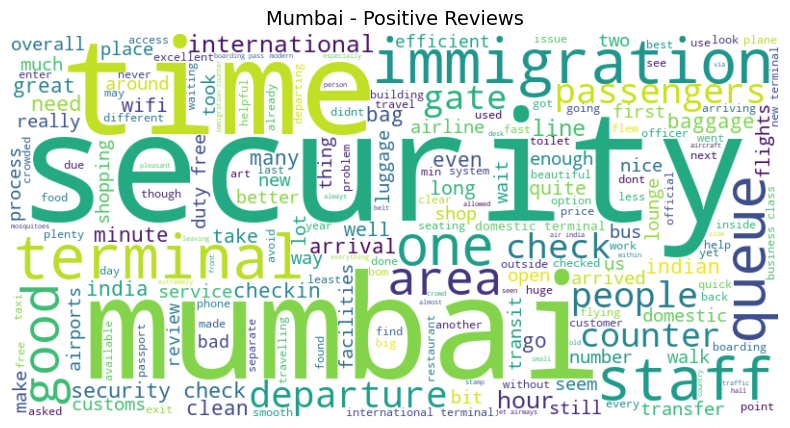

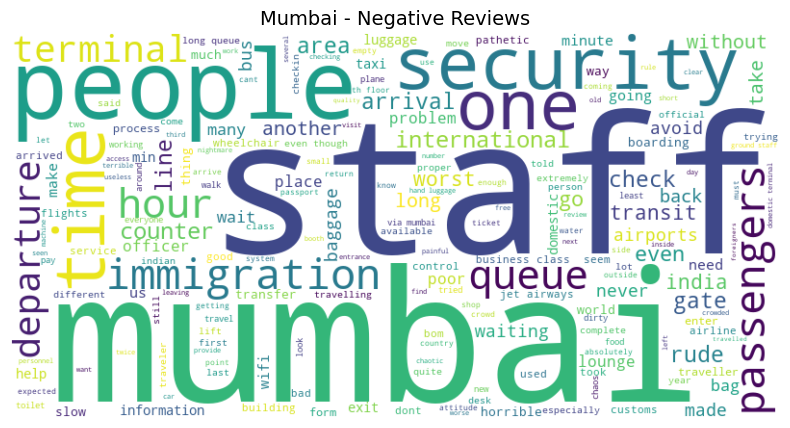

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load your dataset (if not already loaded)
# df = pd.read_csv("your_dataset.csv")

# Define airports of interest
airports = ["Bangalore", "Hyderabad", "Delhi", "Mumbai"]

# Define stopwords (customized)
custom_stopwords = set(STOPWORDS).union({"airport", "experience", "trip", "verified", "passenger", "flight"})

# Function to generate and display word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white",
                          stopwords=custom_stopwords, colormap="viridis").generate(" ".join(text))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# Generate word clouds for each airport
for airport in airports:
    # Filter reviews for the airport
    airport_df = df[df["Airport"] == airport]

    # Positive reviews
    pos_reviews = airport_df[airport_df["Sentiment_Label"] == "Positive"]["Cleaned Review"]
    generate_wordcloud(pos_reviews, f"{airport} - Positive Reviews")

    # Negative reviews
    neg_reviews = airport_df[airport_df["Sentiment_Label"] == "Negative"]["Cleaned Review"]
    generate_wordcloud(neg_reviews, f"{airport} - Negative Reviews")


### Predicting Passenger Recommendation


In [1]:
import pandas as pd
df = pd.read_csv('sentiment_analysis_results.csv')

In [3]:
df.head()

Airport                                             Review  \
0  Istanbul  ✅ Trip Verified | I'm flying 50-60 times a yea...   
1  Istanbul  Not Verified | Ridiculous prices on everything...   
2  Istanbul  Not Verified | The biggest trap for the touris...   
3  Istanbul  ✅ Trip Verified | Fast food price is just ridi...   
4  Istanbul  ✅ Trip Verified | This airport is luxury and n...   

   Overall Rating  Recommended Type of Traveller             Experience  \
0             1.0            0          Business         Departure Only   
1             2.0            0    Family Leisure  Arrival and Departure   
2             1.0            0    Couple Leisure         Departure Only   
3             2.0            0      Solo Leisure                Transit   
4             2.0            0          Business  Arrival and Departure   

   Terminal Cleanliness  Terminal Seating  Terminal Signs  Food & Beverages  \
0                   4.0               2.0             3.0               1.0   
1                   2.0               1.0             3.0               1.0   
2                   1.0               1.0             1.0               1.0   
3                   5.0               5.0             5.0               1.0   
4                   1.0               2.0             3.0               3.0   

   Airport Shopping  Wifi Connectivity  Airport Staff    Year  \
0               3.0                3.0            2.0  2025.0   
1               1.0                1.0            1.0  2025.0   
2               1.0                1.0            1.0  2025.0   
3               1.0                5.0            3.0  2025.0   
4               4.0                2.0            1.0  2025.0   

                                      Cleaned Review  Sentiment_Score  \
0  trip verified im flying times year average mus...           0.1226   
1  verified ridiculous prices everything tired st...          -0.5994   
2  verified biggest trap tourists worldwide one b...           0.4588   
3  trip verified fast food price ridiculously exp...           0.7845   
4  trip verified airport luxury new however multi...          -0.9181   

  Sentiment_Label        Airport Type  
0        Positive  Global Transit Hub  
1        Negative  Global Transit Hub  
2        Positive  Global Transit Hub  
3        Positive  Global Transit Hub  
4        Negative  Global Transit Hub

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport               2666 non-null   object 
 1   Review                2666 non-null   object 
 2   Overall Rating        2666 non-null   float64
 3   Recommended           2666 non-null   int64  
 4   Type of Traveller     2666 non-null   object 
 5   Experience            2666 non-null   object 
 6   Terminal Cleanliness  2666 non-null   float64
 7   Terminal Seating      2666 non-null   float64
 8   Terminal Signs        2666 non-null   float64
 9   Food & Beverages      2666 non-null   float64
 10  Airport Shopping      2666 non-null   float64
 11  Wifi Connectivity     2666 non-null   float64
 12  Airport Staff         2666 non-null   float64
 13  Year                  2666 non-null   object 
 14  Cleaned Review        2666 non-null   object 
 15  Sentiment_Score      

**Checking Class Distribution**

In [7]:
class_counts = df["Recommended"].value_counts(normalize=True)*100
print("Class Distribution:\n", class_counts)

Class Distribution:
 Recommended
0    60.202551
1    39.797449
Name: proportion, dtype: float64


Model does not show severe class imbalance. 

**Checking for Multicolinearity**

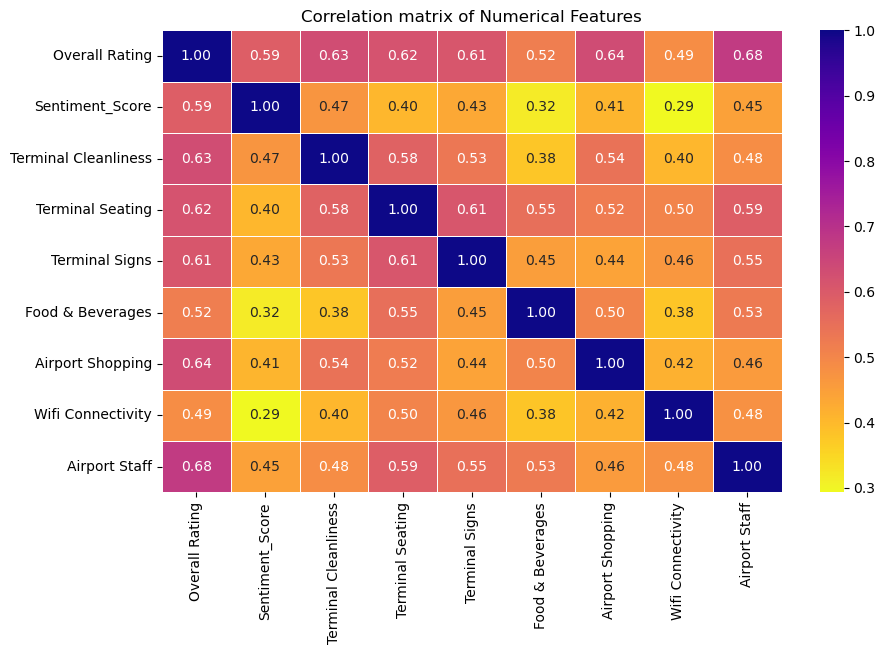

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['Overall Rating', 'Sentiment_Score', 'Terminal Cleanliness', 'Terminal Seating', 'Terminal Signs', 'Food & Beverages', 'Airport Shopping', 'Wifi Connectivity', 'Airport Staff']].corr()

#Heatmap to visualise correlation
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='plasma_r', fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix of Numerical Features")
plt.show()

**Variance Inflation Factor (VIF)**
To check for dependencies

In [47]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Overall Rating', 'Sentiment_Score', 'Terminal Cleanliness', 'Terminal Seating', 
        'Terminal Signs', 'Food & Beverages', 'Airport Shopping', 'Wifi Connectivity', 'Airport Staff']]

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Feature        VIF
0                 const  15.870857
1        Overall Rating   3.233796
2       Sentiment_Score   1.591954
3  Terminal Cleanliness   1.996468
4      Terminal Seating   2.337916
5        Terminal Signs   1.976280
6      Food & Beverages   1.712755
7      Airport Shopping   1.936265
8     Wifi Connectivity   1.516742
9         Airport Staff   2.193408


Values are less than 5 for each of the categories and hence, no serious multicolinearity

**Preparing Data for Modelling**

In [16]:
df.isna().sum().sum()

0

In [18]:
df.shape

(2666, 18)

***Scaling the Data***

In [9]:
from sklearn.preprocessing import StandardScaler

numerical_features = [
    "Overall Rating", "Sentiment_Score", "Terminal Cleanliness", "Terminal Seating", "Terminal Signs", "Food & Beverages", "Airport Shopping", "Wifi Connectivity", "Airport Staff"]

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[numerical_features]= scaler.fit_transform(df_scaled[numerical_features])

df_scaled.head()

Airport                                             Review  \
0  Istanbul  ✅ Trip Verified | I'm flying 50-60 times a yea...   
1  Istanbul  Not Verified | Ridiculous prices on everything...   
2  Istanbul  Not Verified | The biggest trap for the touris...   
3  Istanbul  ✅ Trip Verified | Fast food price is just ridi...   
4  Istanbul  ✅ Trip Verified | This airport is luxury and n...   

   Overall Rating  Recommended Type of Traveller             Experience  \
0       -1.195511            0          Business         Departure Only   
1       -0.873470            0    Family Leisure  Arrival and Departure   
2       -1.195511            0    Couple Leisure         Departure Only   
3       -0.873470            0      Solo Leisure                Transit   
4       -0.873470            0          Business  Arrival and Departure   

   Terminal Cleanliness  Terminal Seating  Terminal Signs  Food & Beverages  \
0              0.333975         -0.806536       -0.380130         -0.899344   
1             -1.193258         -1.643199       -0.380130         -0.899344   
2             -1.956874         -1.643199       -1.944061         -0.899344   
3              1.097591          1.703454        1.183800         -0.899344   
4             -1.956874         -0.806536       -0.380130          0.441999   

   Airport Shopping  Wifi Connectivity  Airport Staff    Year  \
0         -0.094851           0.107379      -0.320678  2025.0   
1         -1.604542          -1.556997      -1.084007  2025.0   
2         -1.604542          -1.556997      -1.084007  2025.0   
3         -1.604542           1.771755       0.442651  2025.0   
4          0.659994          -0.724809      -1.084007  2025.0   

                                      Cleaned Review  Sentiment_Score  \
0  trip verified im flying times year average mus...        -0.208903   
1  verified ridiculous prices everything tired st...        -1.238651   
2  verified biggest trap tourists worldwide one b...         0.270601   
3  trip verified fast food price ridiculously exp...         0.735129   
4  trip verified airport luxury new however multi...        -1.693196   

  Sentiment_Label        Airport Type  
0        Positive  Global Transit Hub  
1        Negative  Global Transit Hub  
2        Positive  Global Transit Hub  
3        Positive  Global Transit Hub  
4        Negative  Global Transit Hub

In [ ]:
#Removing object columns which are not useful in the prediction model
df_scaled = df_scaled.drop(columns=['Review', 'Cleaned Review'])

In [16]:
df_scaled.head()

Airport  Overall Rating  Recommended Type of Traveller  \
0  Istanbul       -1.195511            0          Business   
1  Istanbul       -0.873470            0    Family Leisure   
2  Istanbul       -1.195511            0    Couple Leisure   
3  Istanbul       -0.873470            0      Solo Leisure   
4  Istanbul       -0.873470            0          Business   

              Experience  Terminal Cleanliness  Terminal Seating  \
0         Departure Only              0.333975         -0.806536   
1  Arrival and Departure             -1.193258         -1.643199   
2         Departure Only             -1.956874         -1.643199   
3                Transit              1.097591          1.703454   
4  Arrival and Departure             -1.956874         -0.806536   

   Terminal Signs  Food & Beverages  Airport Shopping  Wifi Connectivity  \
0       -0.380130         -0.899344         -0.094851           0.107379   
1       -0.380130         -0.899344         -1.604542          -1.556997   
2       -1.944061         -0.899344         -1.604542          -1.556997   
3        1.183800         -0.899344         -1.604542           1.771755   
4       -0.380130          0.441999          0.659994          -0.724809   

   Airport Staff    Year  Sentiment_Score Sentiment_Label        Airport Type  
0      -0.320678  2025.0        -0.208903        Positive  Global Transit Hub  
1      -1.084007  2025.0        -1.238651        Negative  Global Transit Hub  
2      -1.084007  2025.0         0.270601        Positive  Global Transit Hub  
3       0.442651  2025.0         0.735129        Positive  Global Transit Hub  
4      -1.084007  2025.0        -1.693196        Negative  Global Transit Hub

In [20]:
df_scaled = df_scaled.drop(columns=["Airport Type"])

In [18]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport               2666 non-null   object 
 1   Overall Rating        2666 non-null   float64
 2   Recommended           2666 non-null   int64  
 3   Type of Traveller     2666 non-null   object 
 4   Experience            2666 non-null   object 
 5   Terminal Cleanliness  2666 non-null   float64
 6   Terminal Seating      2666 non-null   float64
 7   Terminal Signs        2666 non-null   float64
 8   Food & Beverages      2666 non-null   float64
 9   Airport Shopping      2666 non-null   float64
 10  Wifi Connectivity     2666 non-null   float64
 11  Airport Staff         2666 non-null   float64
 12  Year                  2666 non-null   object 
 13  Sentiment_Score       2666 non-null   float64
 14  Sentiment_Label       2666 non-null   object 
 15  Airport Type         

***Splitting the data into training and testing***

In [22]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=["Recommended"])
y = df_scaled["Recommended"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

***Data Encoding***

In [24]:
object_columns = ['Airport', 'Type of Traveller', 'Experience', 'Sentiment_Label', 'Year']

for col in object_columns:
    print(f"{col}")
    print(df[col].unique())
    

Airport
['Istanbul' 'Dubai' 'Doha' 'Abu Dhabi' 'Bangkok' 'Singapore' 'Hong Kong'
 'Delhi' 'Mumbai' 'Bangalore' 'Hyderabad']
Type of Traveller
['Business' 'Family Leisure' 'Couple Leisure' 'Solo Leisure' 'Unknown']
Experience
['Departure Only' 'Arrival and Departure' 'Transit' 'Arrival Only'
 'Unknown']
Sentiment_Label
['Positive' 'Negative' 'Neutral']
Year
['2025.0' '2024.0' '2023.0' '2022.0' '2021.0' '2020.0' '2019.0' '2018.0'
 '2017.0' '2016.0' '2015.0' 'Unknown' '2014.0']


Columns have low cardinality (less than 15 unique values). Hence object datatype columns will undergo onehot encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
OH_cols_train = pd.DataFrame(ohe.fit_transform(X_train[object_columns]))
OH_cols_valid = pd.DataFrame(ohe.transform(X_valid[object_columns]))

OH_cols_train.columns = ohe.get_feature_names_out(object_columns)
OH_cols_valid.columns = ohe.get_feature_names_out(object_columns)

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

num_X_train = X_train.drop(object_columns, axis=1)
num_X_valid = X_valid.drop(object_columns, axis=1)

X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

X_train.columns = X_train.columns.astype(str)
X_valid.columns = X_valid.columns.astype(str)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2132 entries, 1855 to 860
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Overall Rating                    2132 non-null   float64
 1   Terminal Cleanliness              2132 non-null   float64
 2   Terminal Seating                  2132 non-null   float64
 3   Terminal Signs                    2132 non-null   float64
 4   Food & Beverages                  2132 non-null   float64
 5   Airport Shopping                  2132 non-null   float64
 6   Wifi Connectivity                 2132 non-null   float64
 7   Airport Staff                     2132 non-null   float64
 8   Sentiment_Score                   2132 non-null   float64
 9   Airport_Bangalore                 2132 non-null   float64
 10  Airport_Bangkok                   2132 non-null   float64
 11  Airport_Delhi                     2132 non-null   float64
 12  Airport_D

In [30]:
X_train = X_train.drop(columns=['Year_Unknown', 'Experience_Unknown', 'Type of Traveller_Unknown'])
X_valid = X_valid.drop(columns=['Year_Unknown', 'Experience_Unknown', 'Type of Traveller_Unknown'])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)

In [34]:
def evaluation_metrics(y_valid, y_pred):
    print(f"Accuracy: {accuracy_score(y_valid, y_pred)*100:4f}%")
    print("\nClassification Report:\n", classification_report(y_valid, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_pred))

In [36]:
print("Evaluation Metrics of Logistic Regression Model")
print(evaluation_metrics(y_valid, y_pred))

Evaluation Metrics of Logistic Regression Model
Accuracy: 93.258427%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       317
           1       0.93      0.90      0.92       217

    accuracy                           0.93       534
   macro avg       0.93      0.93      0.93       534
weighted avg       0.93      0.93      0.93       534


Confusion Matrix:
 [[302  15]
 [ 21 196]]
None


In [96]:
#Feature Importance 

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient':lr.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nTop features Influencing Recommendation:\n", feature_importance.head(10))


Top features Influencing Recommendation:
                              Feature  Coefficient
0                     Overall Rating     3.585517
28                       Year_2015.0     0.732543
10                   Airport_Bangkok     0.707556
2                   Terminal Seating     0.687335
17                    Airport_Mumbai     0.641648
33                       Year_2020.0     0.548358
20  Type of Traveller_Family Leisure     0.485716
18                 Airport_Singapore     0.431282
30                       Year_2017.0     0.405493
13                     Airport_Dubai     0.375443


**Random Forest Model**

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_valid)

evaluation_metrics (y_valid, y_pred_rf)

Accuracy: 94.007491%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       317
           1       0.95      0.90      0.92       217

    accuracy                           0.94       534
   macro avg       0.94      0.93      0.94       534
weighted avg       0.94      0.94      0.94       534


Confusion Matrix:
 [[307  10]
 [ 22 195]]


In [41]:
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 
                                      'Importance': rf_model.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

In [44]:
print("\nTop Features Influencing Recommendation (Random Forest):\n", feature_importance_rf.head(10))


Top Features Influencing Recommendation (Random Forest):
                      Feature  Importance
0             Overall Rating    0.368407
5           Airport Shopping    0.096776
7              Airport Staff    0.085131
8            Sentiment_Score    0.083463
1       Terminal Cleanliness    0.070909
2           Terminal Seating    0.060108
4           Food & Beverages    0.049770
3             Terminal Signs    0.037593
26  Sentiment_Label_Positive    0.023693
6          Wifi Connectivity    0.022938


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict on validation set
y_pred_best_rf = best_rf_model.predict(X_valid)

# Evaluate
evaluation_metrics(y_valid, y_pred_best_rf)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Accuracy: 93.820225%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       317
           1       0.95      0.89      0.92       217

    accuracy                           0.94       534
   macro avg       0.94      0.93      0.94       534
weighted avg       0.94      0.94      0.94       534


Confusion Matrix:
 [[307  10]
 [ 23 194]]
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Defining Indian and Global airports based on one-hot encoded columns
indian_airports = ["Airport_Bangalore", "Airport_Hyderabad", "Airport_Delhi", "Airport_Mumbai"]
global_hubs = ["Airport_Singapore", "Airport_Hong Kong", "Airport_Doha", "Airport_Dubai", 
               "Airport_Bangkok", "Airport_Istanbul"]

# Filter Indian and Global training data from already processed train/test splits
X_train_india = X_train[X_train[indian_airports].sum(axis=1) == 1]
y_train_india = y_train.loc[X_train_india.index]

X_train_global = X_train[X_train[global_hubs].sum(axis=1) == 1]
y_train_global = y_train.loc[X_train_global.index]

X_valid_india = X_valid[X_valid[indian_airports].sum(axis=1) == 1]
y_valid_india = y_valid.loc[X_valid_india.index]

X_valid_global = X_valid[X_valid[global_hubs].sum(axis=1) == 1]
y_valid_global = y_valid.loc[X_valid_global.index]


In [48]:
# Function to train RF and get feature importance
def train_rf_and_get_importance(X_train, y_train):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    importance_df = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": rf_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    return importance_df



In [60]:
# Train models and get feature importance
importance_india = train_rf_and_get_importance(X_train_india, y_train_india)
importance_global = train_rf_and_get_importance(X_train_global, y_train_global)

# Merge both feature importance tables for comparison
comparison_df = importance_india.merge(importance_global, on="Feature", suffixes=("_India", "_Global"))

# Sort by highest importance difference
comparison_df["Difference"] = comparison_df["Importance_India"] - comparison_df["Importance_Global"]
comparison_df = comparison_df.sort_values(by="Difference", ascending=False)

# Display comparison
print(comparison_df)

                             Feature  Importance_India  Importance_Global  \
1                   Airport Shopping          0.097646           0.058934   
3               Terminal Cleanliness          0.090921           0.055711   
0                     Overall Rating          0.387284           0.363639   
11                     Airport_Delhi          0.006469           0.000000   
2                    Sentiment_Score          0.095863           0.090175   
14                    Airport_Mumbai          0.005663           0.000000   
17                 Airport_Bangalore          0.004816           0.000000   
20                 Airport_Hyderabad          0.004286           0.000000   
18                       Year_2020.0          0.004750           0.001714   
10         Experience_Departure Only          0.007862           0.006260   
12                       Year_2015.0          0.005969           0.004649   
28                       Year_2021.0          0.001567           0.000824   

C:\Users\Krishnan Srinivas\AppData\Local\Temp\ipykernel_25412\1330558165.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette=['#FF6F61', '#6B8E23'])  # Custom colors


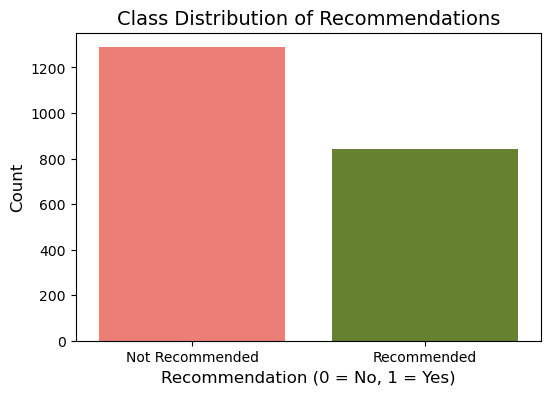

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette=['#FF6F61', '#6B8E23'])  # Custom colors
plt.title("Class Distribution of Recommendations", fontsize=14)
plt.xlabel("Recommendation (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ["Not Recommended", "Recommended"])
plt.show()


In [50]:
import numpy as np
import pandas as pd

# Get feature names from X_train
feature_names = X_train.columns

# Extract coefficients from the trained Logistic Regression model
logistic_coef = lr.coef_[0]  # Get the first row (since it's a binary classification)

# Create a DataFrame for better visualization
logistic_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Logistic Regression Importance": np.abs(logistic_coef)  # Take absolute values
})

# Sort by importance
logistic_importance_df = logistic_importance_df.sort_values("Logistic Regression Importance", ascending=False)

# Get the top features and their values
top_features_logistic = logistic_importance_df["Feature"].values[:10]  # Top 10 features
top_coef_values = logistic_importance_df["Logistic Regression Importance"].values[:10]  # Corresponding values



In [52]:
rf_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Random Forest Importance": rf_model.feature_importances_
}).sort_values("Random Forest Importance", ascending=False)

top_features_rf = rf_importance_df["Feature"].values[:10]  # Top 10 features


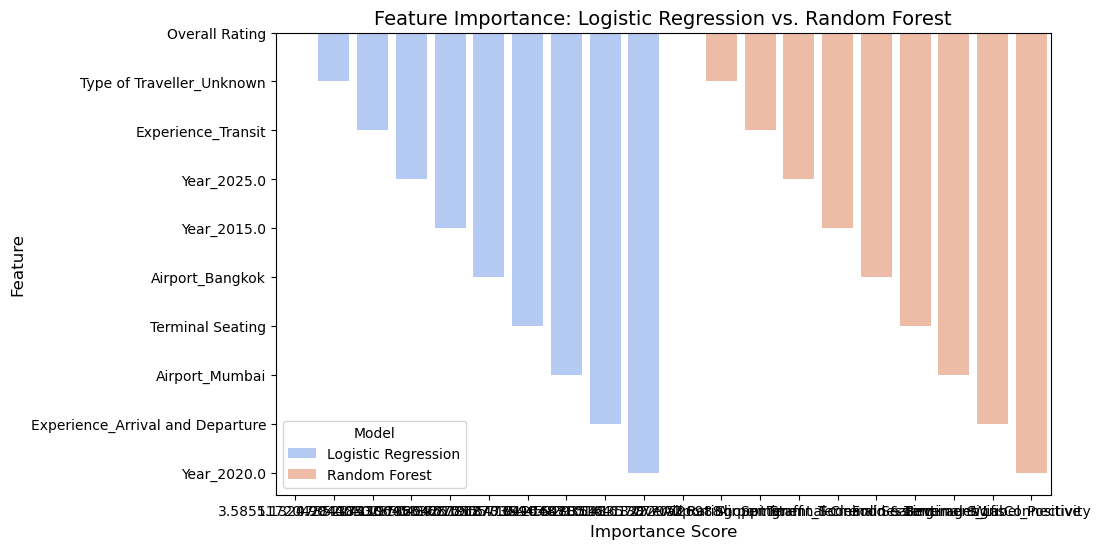

In [135]:
import pandas as pd

# Combine top feature importance from both models
feature_importance_df = pd.DataFrame({
    "Feature": top_features_logistic[:10],  # Top 10 from Logistic Regression
    "Logistic Regression": top_coef_values[:10],  # Corresponding Coefficients
    "Random Forest": top_features_rf[:10]  # Top 10 from Random Forest
}).melt(id_vars="Feature", var_name="Model", value_name="Importance")

# Plot feature importance comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", hue="Model", palette="coolwarm")
plt.title("Feature Importance: Logistic Regression vs. Random Forest", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.legend(title="Model")
plt.show()


C:\Users\Krishnan Srinivas\AppData\Local\Temp\ipykernel_2784\2923035815.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_features_logistic, x=top_coef_values, palette="Blues_r")


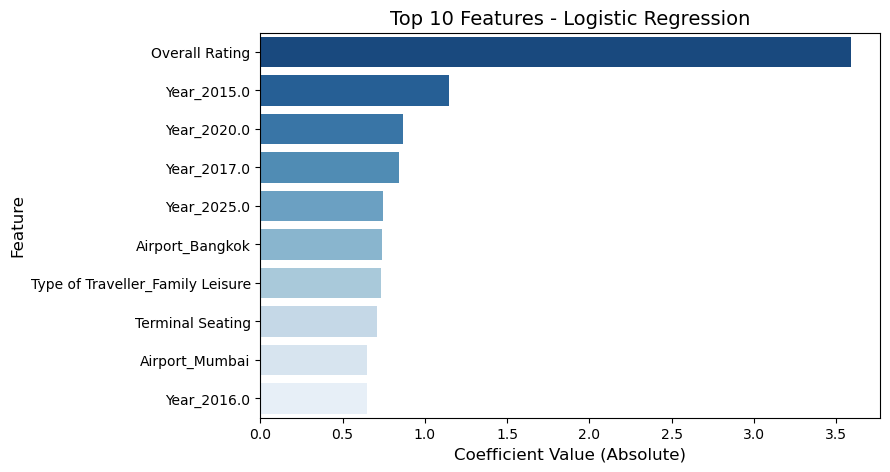

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Logistic Regression
plt.figure(figsize=(8, 5))
sns.barplot(y=top_features_logistic, x=top_coef_values, palette="Blues_r")
plt.xlabel("Coefficient Value (Absolute)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 10 Features - Logistic Regression", fontsize=14)
plt.show()


C:\Users\Krishnan Srinivas\AppData\Local\Temp\ipykernel_2784\1622530924.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_features_rf, x=top_rf_values, palette="Greens_r")


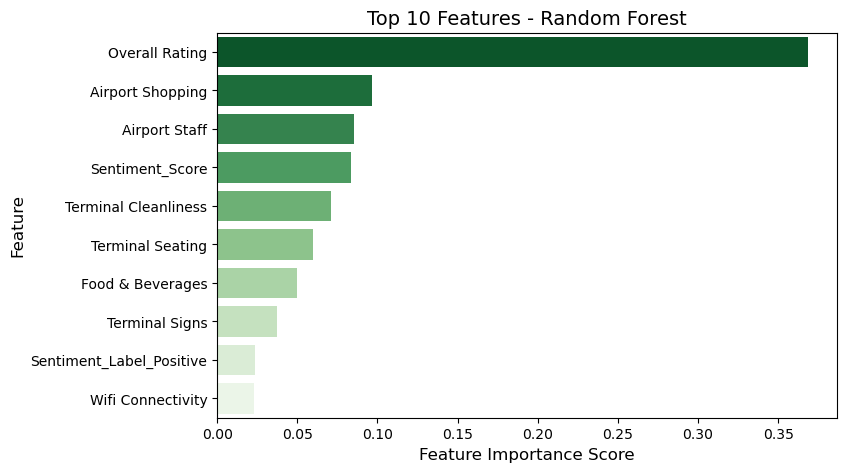

In [56]:
# Extract top 10 feature importance values and names
top_features_rf = rf_importance_df["Feature"].values[:10]
top_rf_values = rf_importance_df["Random Forest Importance"].values[:10]

# Plot for Random Forest
plt.figure(figsize=(8, 5))
sns.barplot(y=top_features_rf, x=top_rf_values, palette="Greens_r")
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 10 Features - Random Forest", fontsize=14)
plt.show()


In [62]:
# Sort by feature importance for each region
top_india = comparison_df.sort_values(by="Importance_India", ascending=False).head(10)
top_global = comparison_df.sort_values(by="Importance_Global", ascending=False).head(10)


C:\Users\Krishnan Srinivas\AppData\Local\Temp\ipykernel_2784\1792711037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_india["Feature"], x=top_india["Importance_India"], palette="Reds_r")


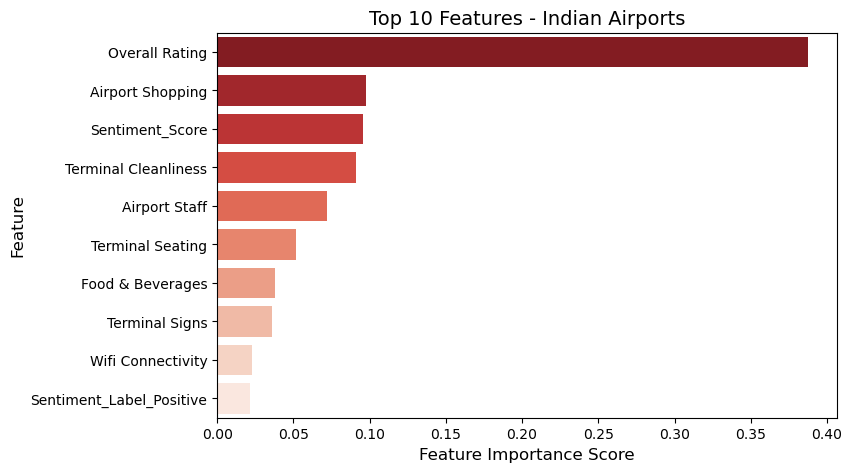

In [64]:
plt.figure(figsize=(8, 5))
sns.barplot(y=top_india["Feature"], x=top_india["Importance_India"], palette="Reds_r")

plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 10 Features - Indian Airports", fontsize=14)
plt.show()



C:\Users\Krishnan Srinivas\AppData\Local\Temp\ipykernel_2784\869367893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_global["Feature"], x=top_global["Importance_Global"], palette="Purples_r")


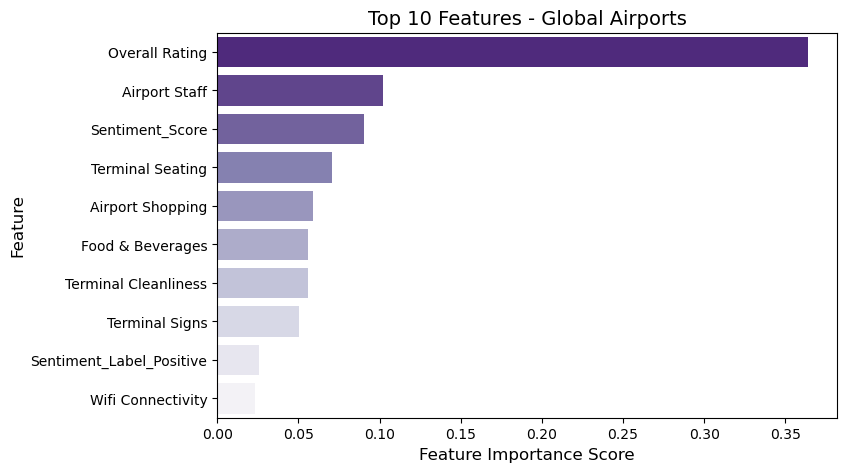

In [66]:
plt.figure(figsize=(8, 5))
sns.barplot(y=top_global["Feature"], x=top_global["Importance_Global"], palette="Purples_r")

plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 10 Features - Global Airports", fontsize=14)
plt.show()

